# 종합실습2_MNIST

## 1.환경준비

### (1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.backend import clear_session
from keras.optimizers import Adam
from keras.datasets import mnist, fashion_mnist

* 함수 만들기

In [2]:
# 학습곡선 함수
def dl_history_plot(history):
    plt.figure(figsize=(10,6))
    plt.plot(history['loss'], label='train_err')
    plt.plot(history['val_loss'], label='val_err')

    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend()
    plt.grid()
    plt.show()

### (2) 데이터로딩

![](https://wikidocs.net/images/page/60324/mnist.png)

In [3]:
# 케라스 데이터셋으로 부터 mnist 불러오기
(x_train, y_train), (x_val, y_val) = mnist.load_data()

In [4]:
x_train.shape, y_train.shape # 28*28 데이터가 60,000개

((60000, 28, 28), (60000,))

In [5]:
class_names = ['0','1','2','3','4','5','6','7','8','9']

## 2 데이터 살펴보기

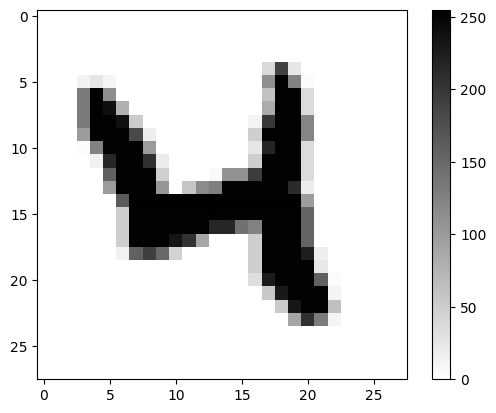

In [6]:
# 아래 숫자를 바꿔가며 화면에 그려 봅시다.
n = 20

plt.figure()
plt.imshow(x_train[n], cmap=plt.cm.binary) # 픽셀값 반전해 보여줌 (숫자가 클수록 검게)
plt.colorbar()
plt.show()

In [7]:
np.set_printoptions(threshold=np.inf, linewidth=np.inf) # 한 행의 모든 요소는 줄바꿈 없이 출력
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  38, 190,  25,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  13,  25,  10,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 112, 252, 125,   4,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 113,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 240,  79,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  84, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0, 132, 252, 252, 238,  52,   0,   0,   0,   0,   0,   0,   0,   0,  12, 198, 252, 252, 122,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,  99, 252, 252, 252, 181,  17,   0,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 122,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   3, 125, 252, 252, 252, 100,   0,   0,   0,   0,   0,   0,   0,  26, 218, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  15, 216, 252, 252, 207,  19,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 157, 252, 252, 252,  48,   0,   0,   0,   6, 109, 109, 194, 252, 252, 252,  36,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0, 100, 252, 252, 252, 105,   0,  58, 116, 128, 252, 252, 252, 252, 252, 212,  19,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0, 164, 253, 253, 253, 253, 253, 253, 255, 253, 253, 253, 253, 253, 253,  99,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252, 253, 252, 252, 252, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252, 252, 252, 217, 216, 141, 126, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 234, 204,  89,   0,   0,   0,  49, 252, 252, 252, 155,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  14, 158, 192, 151,  45,   0,   0,   0,   0,   0,  49, 252, 252, 252, 225,  17,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  49, 252, 252, 252, 252,  23,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  33, 228, 252, 252, 252, 157,   4,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  55, 229, 252, 252, 252,  11,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  53, 232, 252, 252,  63,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  90, 206, 131,  11,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

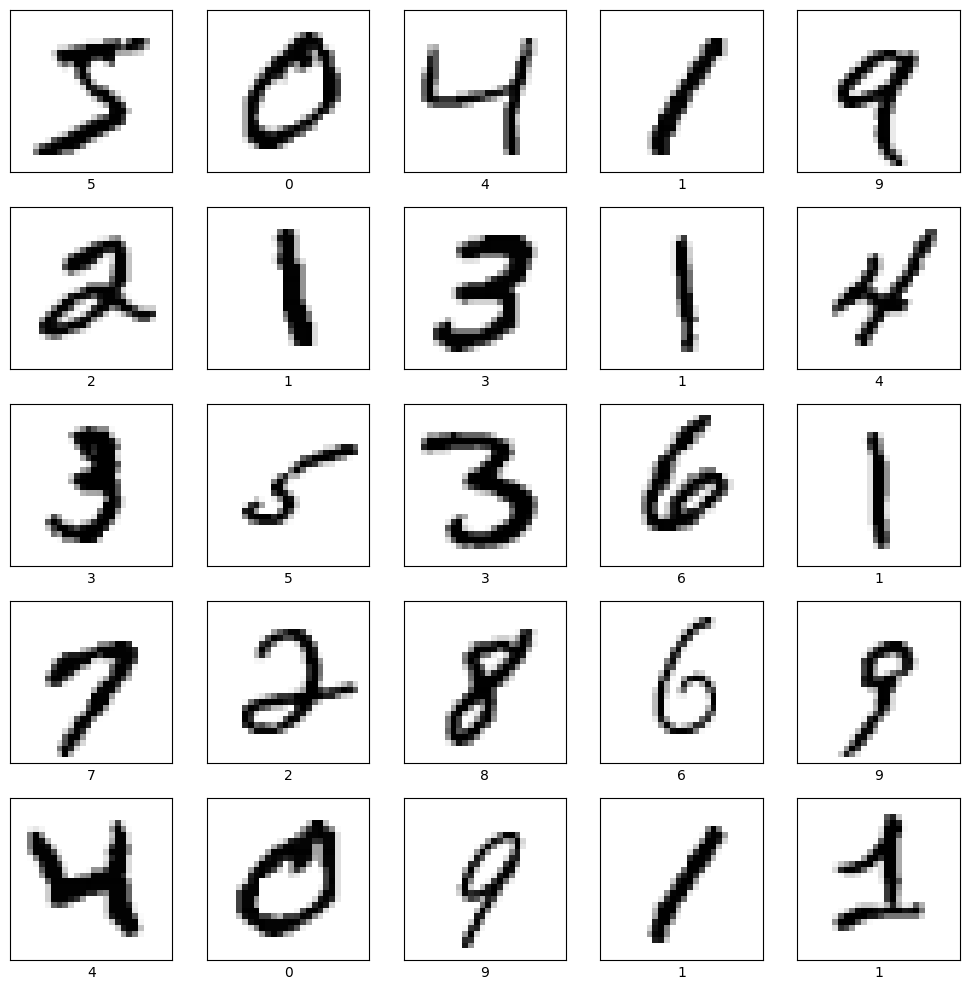

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

## 3.데이터 준비

### (1) 데이터 2차원으로 펼치기

In [9]:
x_train.shape, y_train.shape, x_val.shape, y_val.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [10]:
a = np.array([[1,2,3],[4,5,6]])
a, a.shape

(array([[1, 2, 3],
        [4, 5, 6]]),
 (2, 3))

In [11]:
#
print(a.reshape(3,2))
print(a.reshape(6,1))
print(a.reshape(6, -1))

[[1 2]
 [3 4]
 [5 6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]
[[1]
 [2]
 [3]
 [4]
 [5]
 [6]]


In [12]:
x_train = x_train.reshape(60000, -1) # 28*28짜리 데이터 하나가 한 행에 들어감
x_val = x_val.reshape(10000, -1)

In [13]:
x_train.shape, x_val.shape

((60000, 784), (10000, 784))

### (2) Scaling : Min-Max
* 0-255 값으로 되어 있는 데이터를 0-1사이 값으로 변환
* x_train, x_test를 그냥 255로 나누면 됨
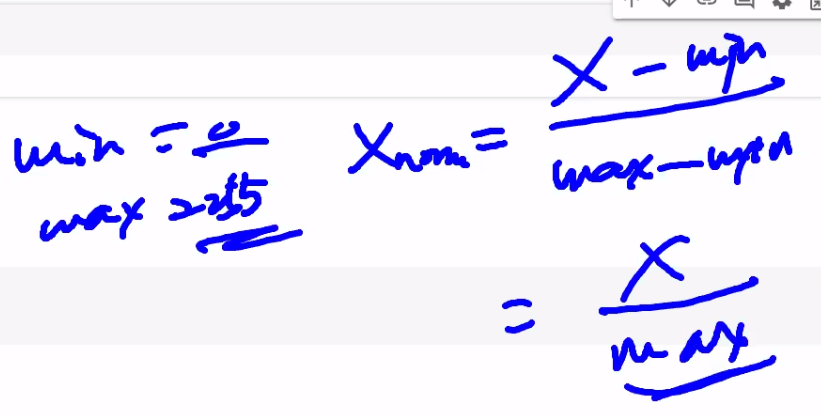

In [14]:
x_train = x_train / 255. # . 안 붙여도 상관 X
x_test = x_val / 255.

## 4.모델링

In [15]:
nfeatures = x_train.shape[1]
nfeatures

784

In [16]:
clear_session()

model = Sequential(Dense(10, input_shape = (nfeatures,), activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7850 (30.66 KB)
Trainable params: 7850 (30.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [17]:
model.compile(optimizer=Adam(learning_rate=0.001), loss= 'sparse_categorical_crossentropy' )

history = model.fit(x_train, y_train, epochs = 10, validation_split=0.2).history

Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5040 - val_loss: 0.3154
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3169 - val_loss: 0.2880
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2925 - val_loss: 0.2744
Epoch 4/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.2805 - val_loss: 0.2769
Epoch 5/10
1500/1500 [==============================] - 4s 2ms/step - loss: 0.2733 - val_loss: 0.2671
Epoch 6/10
1404/1500 [===========================>..] - ETA: 0s - loss: 0.2661

KeyboardInterrupt: 

* 학습결과 그래프

In [ ]:
dl_history_plot(history)

* 예측 및 평가

In [ ]:
pred = model.predict(x_test)

In [ ]:
pred[:5]

In [ ]:
pred_1 = pred.argmax(axis=1)

In [ ]:
pred_1[:5]

In [ ]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

## 5.실습

* 히든레이어를 추가하여 모델을 2가지 이상 만들고 성능을 비교해 봅시다.
* 성능에 영향을 주는 요인은
    * 히든레이어 수
    * 노드수
    * epochs 수 (10~20 사이에서 정하세요)
    * learning_rate

### (1) 모델1

In [18]:
clear_session()

model = Sequential([
    Dense(128, input_shape = (nfeatures, ), activation = 'relu'),
    Dense(64, activation = 'relu'),
    Dense(32, activation = 'relu'),
    Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 111146 (434.16 KB)
Trainable params: 111146 (434.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer = Adam(learning_rate=0.005), loss='sparse_categorical_crossentropy')

In [26]:
history = model.fit(x_train, y_train, epochs = 20, validation_split=.2).history

Epoch 1/20
1500/1500 [==============================] - 10s 5ms/step - loss: 0.0575 - val_loss: 0.2135
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0462 - val_loss: 0.2259
Epoch 3/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0439 - val_loss: 0.2174
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0449 - val_loss: 0.2109
Epoch 5/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0318 - val_loss: 0.2520
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0382 - val_loss: 0.2220
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0314 - val_loss: 0.2498
Epoch 8/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0340 - val_loss: 0.2506
Epoch 9/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0332 - val_loss: 0.2528
Epoch 10/20
1500/1500 [==============================] - 5s 4ms/step - loss: 0.03

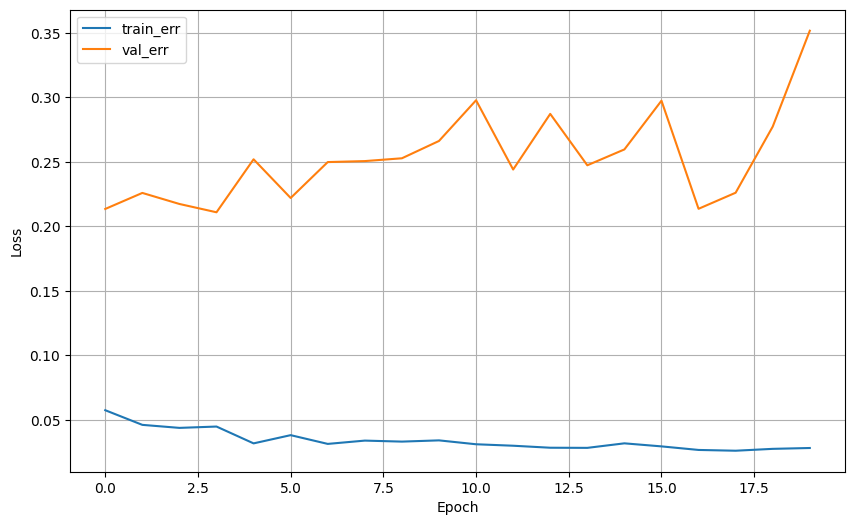

In [27]:
dl_history_plot(history)

In [28]:
pred = model.predict(x_val)

313/313 [==============================] - 1s 2ms/step


In [29]:
pred_1 = np.argmax(pred, axis=1)

In [30]:
print(confusion_matrix(y_val, pred_1))
print(classification_report(y_val, pred_1))

[[ 973    0    1    2    0    1    1    0    1    1]
 [   0 1124    4    1    1    0    0    0    5    0]
 [   2    2 1012    4    1    0    2    7    2    0]
 [   1    0    7  995    0    2    0    1    1    3]
 [   2    2    4    1  944    0    7    4    4   14]
 [   2    0    2   28    0  844    3    1    8    4]
 [   5    2    4    0    2    8  932    0    5    0]
 [   1    4    7    5    1    0    0 1002    3    5]
 [   3    3   15   35    2    4    1    5  903    3]
 [   2    5    3    7    4    8    0    6    0  974]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.98      0.99      0.99      1135
           2       0.96      0.98      0.97      1032
           3       0.92      0.99      0.95      1010
           4       0.99      0.96      0.97       982
           5       0.97      0.95      0.96       892
           6       0.99      0.97      0.98       958
           7       0.98      0.97   